# 2021/12/28
# 本代码绘制version1.2中的fig6 垂直纬向风场的uvw图
# 包含内容有辐合辐散、经向风、u-w风场

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches

import warnings
warnings.filterwarnings("ignore")

path =   "/home/sun/qomo-data/"
lon_slice  =  slice(50,120)
lat_slice  =  slice(10,15)
lev_slice  =  slice(1000,200)

f1   =   xr.open_dataset(path+"composite_equivalent_tem.nc").sel(lon=lon_slice,lat=lat_slice,level=lev_slice).isel(time=slice(0,30))

theta1      =  f1.theate_e
avg_theta   =  np.average(np.average(theta1,axis=0),axis=1)

f2     =  xr.open_dataset("/home/sun/qomo-data/composite3.nc").sel(lat=slice(10,15),lon=lon_slice,level=lev_slice)
uwind  =  np.nanmean(f2.uwind,axis=2)
vwind  =  np.nanmean(f2.vwind,axis=2)
omega  =  np.nanmean(f2.OMEGA,axis=2)*-60


# 计算散度
f4   =   xr.open_dataset(path+"composite-div_vor.nc").sel(lat=slice(10,15),lon=lon_slice,level=lev_slice)
div  =   np.nanmean(f4.div,axis=2)

# 计算地形
f5   =   xr.open_dataset("/home/sun/data/gebco/bathymetric.nc").sel(lat=slice(10,15),lon=lon_slice)
dixing  =  f5.elevation.data
dixing[dixing <= 0]  =  0
topo    =  np.average(dixing,axis=0)

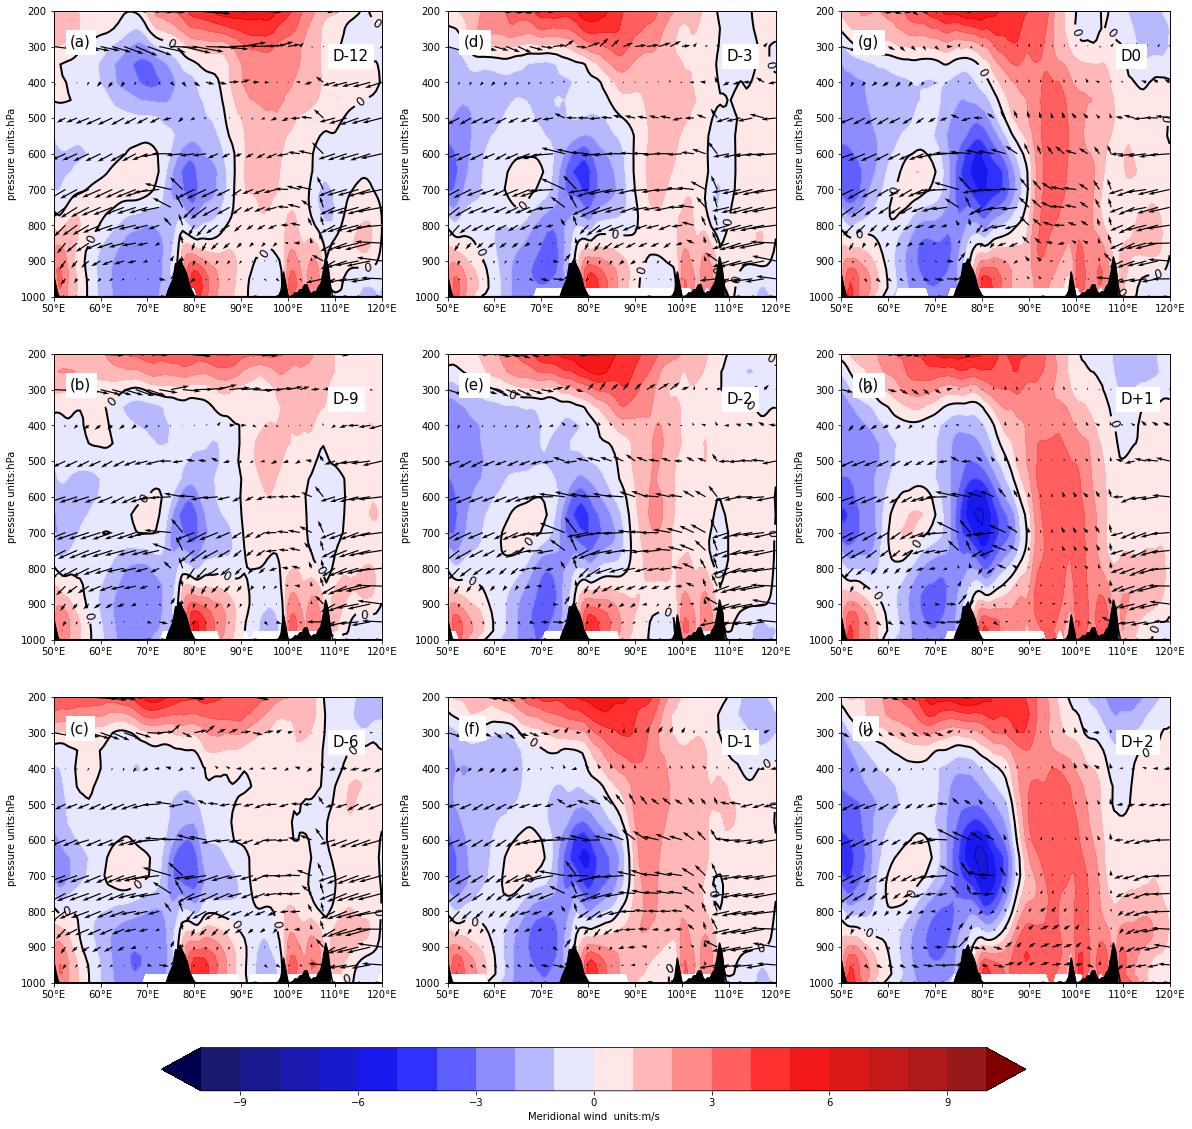

In [2]:
dates  =  [-12,-9,-6,-3,-2,-1,0,1,2] #总共9张图
date   =  [18,21,24,27,28,29,30,31,32]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
# 创建画布
fig  =  plt.figure(figsize=(20,20))
spec =  fig.add_gridspec(nrows=3,ncols=3)

j  =  0
for col in range(3):
    for row in range(3):
        ax   =  fig.add_subplot(spec[row,col])
        ax.invert_yaxis()

        # 绘制等值线
        im1   =  ax.contour(f4.lon,f4.level,vwind[date[j],:],[0],linewidths=2,colors='k')
        im2   =  ax.contourf(f4.lon,f4.level,vwind[date[j],:],np.linspace(-10,10,21),cmap='seismic',extend='both',alpha=0.9,zorder=0)
        ax.clabel(im1, [0], inline=True, fontsize=12)
        q  =  ax.quiver(f2.lon[::4], f2.level[::2], uwind[date[j],::2,::4], omega[date[j],::2,::4], 
                        angles='uv',# regrid_shape这个参数越小，是两门就越稀疏
                        scale_units='xy', scale=1.1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                        units='xy', width=2.2,
                        color='k',zorder=2)
        #fig.colorbar(im2,label='meridional wind units: ${m s^-1}$')

        ax.set_xticklabels(generate_lon_label(50,120,10))

        ax.set_ylabel("pressure units:hPa")

        if dates[j]<0:
            ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
        elif dates[j]>0:
            ax.text(0.85,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
        else:
            ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
        ax.text(0.05,0.875,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)

        # 添加地形
        ax2  =  ax.twinx()
        ax2.set_ylim((0,4.5))
        #ax2.set_yticks(np.arange(0,21,1))
        ax2.plot(f5.lon.data,topo/1000,color='k')
        ax2.fill_between(f5.lon.data,0,topo/1000,where=topo>0,color='k')

        ax2.set_yticklabels([])
        ax2.set_yticks([])

        j+=1

fig.subplots_adjust(top=0.8) #整体往上紧凑来给下面的colorbar增加空间

cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03])  #依次是左端 下端 宽度 高度
fig.colorbar(im2, cax=cbar_ax, shrink=0.1, pad=0.2, orientation='horizontal',label="Meridional wind  units:m/s") #这样画就可以了
plt.savefig("/home/sun/paint/lunwen/version1.3-20220108/fig5_version1.1_div_vwind_vector.pdf",dpi=350)

# 根据要求对图片进行删减

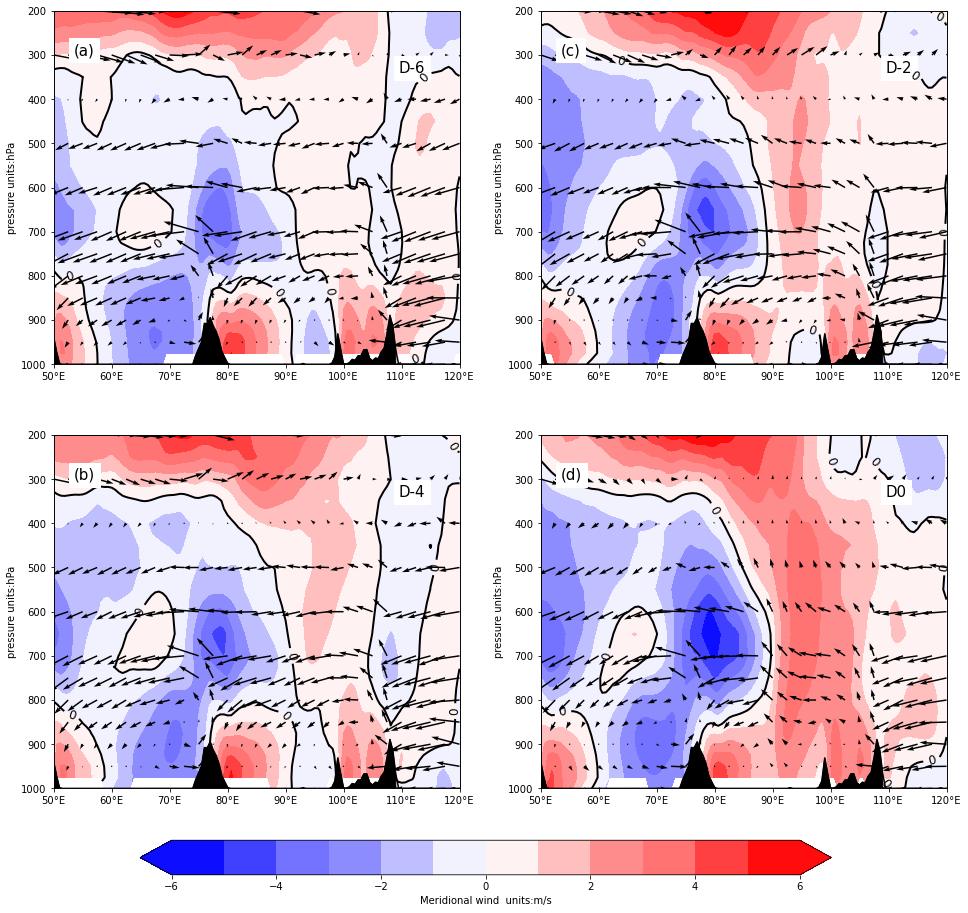

In [12]:
cmap  =  create_ncl_colormap("/home/sun/data/color_rgb/GMT_polar.txt",20)

#dates  =  [-12,-9,-6,-3,-2,-1,0,1,2] #总共9张图
#date   =  [18,21,24,27,28,29,30,31,32]
dates  =  [-6,-4,-2,0] #总共9张图
date   =  [24,26,28,30]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
# 创建画布
fig  =  plt.figure(figsize=(16,16))
spec =  fig.add_gridspec(nrows=2,ncols=2)

j  =  0
for col in range(2):
    for row in range(2):
        ax   =  fig.add_subplot(spec[row,col])
        ax.invert_yaxis()

        # 绘制等值线
        im1   =  ax.contour(f4.lon,f4.level,vwind[date[j],:],[0],linewidths=2,colors='k')
        im2   =  ax.contourf(f4.lon,f4.level,vwind[date[j],:],np.linspace(-6,6,13),cmap=cmap,extend='both',alpha=1.0,zorder=0)
        ax.clabel(im1, [0], inline=True, fontsize=12)
        q  =  ax.quiver(f2.lon[::4], f2.level[::2], uwind[date[j],::2,::4], omega[date[j],::2,::4], 
                        angles='uv',# regrid_shape这个参数越小，是两门就越稀疏
                        scale_units='xy', scale=1.1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                        units='xy', width=2.2,
                        color='k',zorder=2)
        #fig.colorbar(im2,label='meridional wind units: ${m s^-1}$')

        ax.set_xticklabels(generate_lon_label(50,120,10))

        ax.set_ylabel("pressure units:hPa")

        if dates[j]<0:
            ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
        elif dates[j]>0:
            ax.text(0.85,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
        else:
            ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
        ax.text(0.05,0.875,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)

        # 添加地形
        ax2  =  ax.twinx()
        ax2.set_ylim((0,4.5))
        #ax2.set_yticks(np.arange(0,21,1))
        ax2.plot(f5.lon.data,topo/1000,color='k')
        ax2.fill_between(f5.lon.data,0,topo/1000,where=topo>0,color='k')

        ax2.set_yticklabels([])
        ax2.set_yticks([])

        j+=1

fig.subplots_adjust(top=0.8) #整体往上紧凑来给下面的colorbar增加空间

cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03])  #依次是左端 下端 宽度 高度
fig.colorbar(im2, cax=cbar_ax, shrink=0.1, pad=0.2, orientation='horizontal',label="Meridional wind  units:m/s") #这样画就可以了
plt.savefig("/home/sun/paint/lunwen/version2.0/fig5_version2.0_div_vwind_vector_1.pdf",dpi=350)

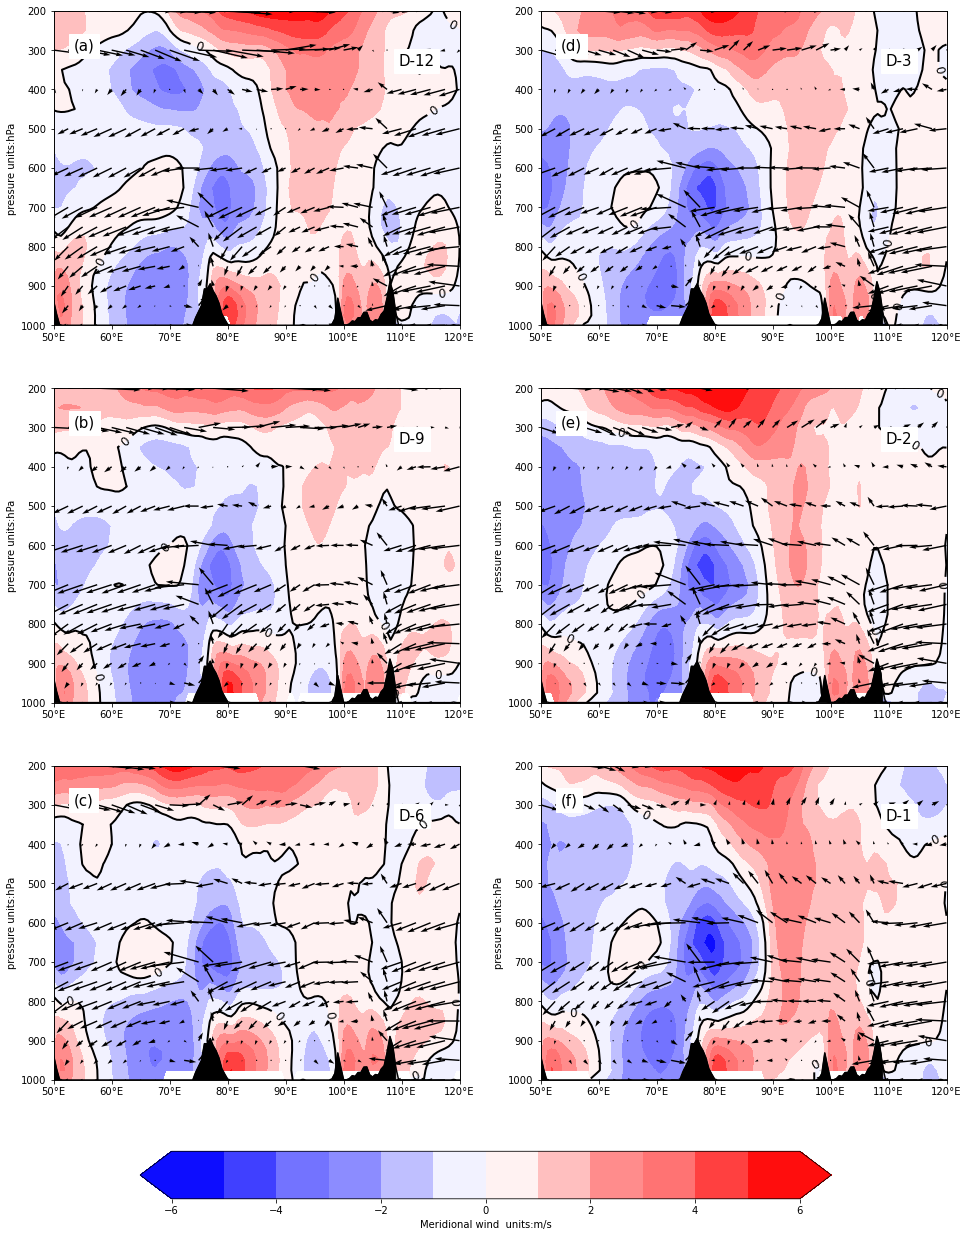

In [13]:
cmap  =  create_ncl_colormap("/home/sun/data/color_rgb/GMT_polar.txt",20)

dates  =  [-12,-9,-6,-3,-2,-1,0,1,2] #总共9张图
date   =  [18,21,24,27,28,29,30,31,32]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
# 创建画布
fig  =  plt.figure(figsize=(16,22))
spec =  fig.add_gridspec(nrows=3,ncols=2)

j  =  0
for col in range(2):
    for row in range(3):
        ax   =  fig.add_subplot(spec[row,col])
        ax.invert_yaxis()

        # 绘制等值线
        im1   =  ax.contour(f4.lon,f4.level,vwind[date[j],:],[0],linewidths=2,colors='k')
        im2   =  ax.contourf(f4.lon,f4.level,vwind[date[j],:],np.linspace(-6,6,13),cmap=cmap,extend='both',alpha=1.0,zorder=0)
        ax.clabel(im1, [0], inline=True, fontsize=12)
        q  =  ax.quiver(f2.lon[::4], f2.level[::2], uwind[date[j],::2,::4], omega[date[j],::2,::4], 
                        angles='uv',# regrid_shape这个参数越小，是两门就越稀疏
                        scale_units='xy', scale=1.1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                        units='xy', width=2.2,
                        color='k',zorder=2)
        #fig.colorbar(im2,label='meridional wind units: ${m s^-1}$')

        ax.set_xticklabels(generate_lon_label(50,120,10))

        ax.set_ylabel("pressure units:hPa")

        if dates[j]<0:
            ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
        elif dates[j]>0:
            ax.text(0.85,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
        else:
            ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
        ax.text(0.05,0.875,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)

        # 添加地形
        ax2  =  ax.twinx()
        ax2.set_ylim((0,4.5))
        #ax2.set_yticks(np.arange(0,21,1))
        ax2.plot(f5.lon.data,topo/1000,color='k')
        ax2.fill_between(f5.lon.data,0,topo/1000,where=topo>0,color='k')

        ax2.set_yticklabels([])
        ax2.set_yticks([])

        j+=1

fig.subplots_adjust(top=0.8) #整体往上紧凑来给下面的colorbar增加空间

cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03])  #依次是左端 下端 宽度 高度
fig.colorbar(im2, cax=cbar_ax, shrink=0.1, pad=0.2, orientation='horizontal',label="Meridional wind  units:m/s") #这样画就可以了
plt.savefig("/home/sun/paint/lunwen/version2.0/fig5_version2.0_div_vwind_vector_2.pdf",dpi=350)